This script is designed to quantify similarities and differences between two aspects of the visual pathway in object recognition.

DICE COEEFICIENT 

In [6]:
# calculate dice coefficient between pIPS and LO FC maps
import os
import numpy as np
import pandas as pd
import nibabel as nib
from nilearn import image
import matplotlib.pyplot as plt

# Define study directories
results_dir = '/user_data/csimmon2/git_repos/ptoc/results'
group_out_dir = f'{results_dir}/group_averages'

def dice_coefficient(img1, img2):
    """Calculate Dice coefficient between two binary images."""
    # Get data arrays and ensure binary
    img1_data = (img1.get_fdata() > 0).astype(int)
    img2_data = (img2.get_fdata() > 0).astype(int)
    
    # Calculate intersection
    intersection = np.sum(img1_data * img2_data)
    
    # Calculate Dice using standard formula: 2*intersection/(sum of elements)
    dice = 2.0 * intersection / (np.sum(img1_data) + np.sum(img2_data))
    
    return dice

def main():
    # Define ROIs and hemispheres
    rois = ['pIPS', 'LO']
    hemispheres = ['left', 'right']
    analysis_type = 'fc'  # Using fc as specified in your goal
    
    # Create a results table
    results = []
    
    # Compare across hemispheres
    for hemi in hemispheres:
        # Load images
        pips_img_path = f'{group_out_dir}/pIPS_{hemi}_{analysis_type}_thresh.nii.gz'
        lo_img_path = f'{group_out_dir}/LO_{hemi}_{analysis_type}_thresh.nii.gz'
        
        # Check if files exist
        if not os.path.exists(pips_img_path):
            print(f"Warning: File not found - {pips_img_path}")
            continue
            
        if not os.path.exists(lo_img_path):
            print(f"Warning: File not found - {lo_img_path}")
            continue
            
        # Both files exist, proceed with analysis
        pips_img = nib.load(pips_img_path)
        lo_img = nib.load(lo_img_path)
        
        # Calculate Dice coefficient
        dice_score = dice_coefficient(pips_img, lo_img)
        
        results.append({
            'Hemisphere': hemi,
            'ROI1': 'pIPS',
            'ROI2': 'LO',
            'Dice': dice_score
        })
        
        print(f"Dice coefficient for {hemi} hemisphere, pIPS vs LO: {dice_score:.4f}")
    
    # Check if we have any results
    if not results:
        print("No results were calculated. Please check if the input files exist.")
        return None
    
    # Convert results to DataFrame for easy viewing
    results_df = pd.DataFrame(results)
    print("\nResults summary:")
    print(results_df)
    
    # Create a simple bar plot of results
    plt.figure(figsize=(8, 6))
    bars = plt.bar(
        [f"{r['Hemisphere']} hemisphere" for r in results],
        [r['Dice'] for r in results]
    )
    plt.title('Dice Coefficient Between pIPS and LO FC Maps')
    plt.ylabel('Dice Coefficient')
    plt.ylim(0, 1)  # Dice coef ranges from 0-1
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2.,
            height + 0.01,
            f'{height:.4f}',
            ha='center', va='bottom'
        )
    
    # Save plot
    plot_path = f'{results_dir}/pIPS_LO_dice_comparison.png'
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    print(f"Saved plot to: {plot_path}")
    plt.close()
    
    return results_df

if __name__ == "__main__":
    results = main()

Dice coefficient for left hemisphere, pIPS vs LO: 0.6965
Dice coefficient for right hemisphere, pIPS vs LO: 0.6930

Results summary:
  Hemisphere  ROI1 ROI2      Dice
0       left  pIPS   LO  0.696452
1      right  pIPS   LO  0.692965
Saved plot to: /user_data/csimmon2/git_repos/ptoc/results/pIPS_LO_dice_comparison.png



ANALYSIS TYPE: FC

Left hemisphere analysis (fc):
Dice coefficient: 0.6965
pIPS only: 13341 voxels (32.4%)
LO only: 5832 voxels (14.2%)
Overlap: 21995 voxels (53.4%)

Right hemisphere analysis (fc):
Dice coefficient: 0.6930
pIPS only: 13908 voxels (34.6%)
LO only: 4982 voxels (12.4%)
Overlap: 21317 voxels (53.0%)

ANALYSIS TYPE: PPI

Left hemisphere analysis (ppi):
Dice coefficient: 0.7870
pIPS only: 2406 voxels (13.1%)
LO only: 4051 voxels (22.0%)
Overlap: 11926 voxels (64.9%)

Right hemisphere analysis (ppi):
Dice coefficient: 0.7056
pIPS only: 7619 voxels (31.9%)
LO only: 3248 voxels (13.6%)
Overlap: 13025 voxels (54.5%)

FC Results summary:
  Analysis Hemisphere      Dice  pIPS_only  LO_only  Overlap  Total  \
0       fc       left  0.696452      13341     5832    21995  41168   
1       fc      right  0.692965      13908     4982    21317  40207   

   pIPS_only_pct  LO_only_pct  Overlap_pct  
0      32.406238    14.166343    53.427419  
1      34.590992    12.390877    53.018131

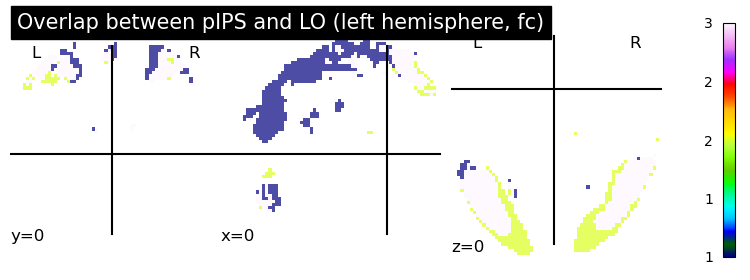

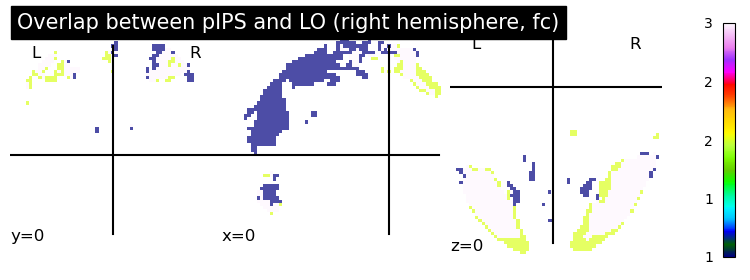

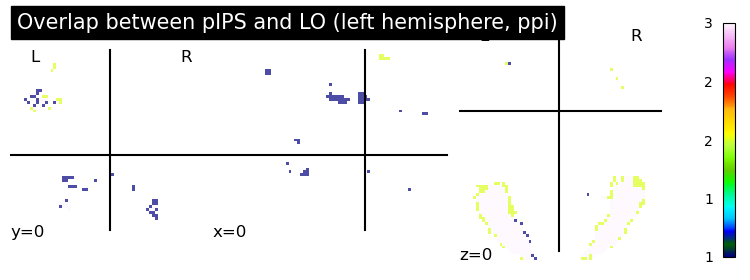

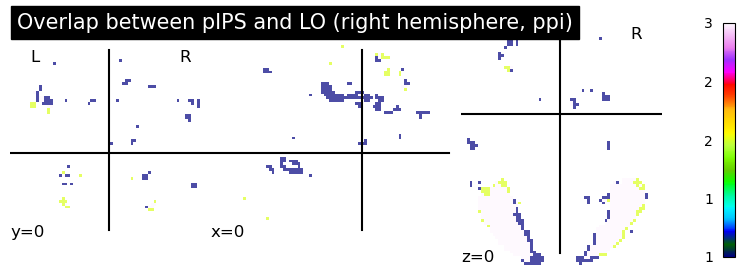

In [9]:
# Break down the overlap between pIPS and LO for review of results
## add PPI
import os
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn import plotting

# Define study directories
results_dir = '/user_data/csimmon2/git_repos/ptoc/results'
group_out_dir = f'{results_dir}/group_averages'

def dice_coefficient(img1, img2):
    """Calculate Dice coefficient between two binary images."""
    # Get data arrays and ensure binary
    img1_data = (img1.get_fdata() > 0).astype(int)
    img2_data = (img2.get_fdata() > 0).astype(int)
    
    # Calculate intersection
    intersection = np.sum(img1_data * img2_data)
    
    # Calculate Dice using standard formula: 2*intersection/(sum of elements)
    dice = 2.0 * intersection / (np.sum(img1_data) + np.sum(img2_data))
    
    return dice, img1_data, img2_data

def main():
    # Define hemispheres and analysis types
    hemispheres = ['left', 'right']
    analysis_types = ['fc', 'ppi']
    
    # Create results tables
    results = []
    
    # Loop through analysis types
    for analysis_type in analysis_types:
        print(f"\n{'='*50}")
        print(f"ANALYSIS TYPE: {analysis_type.upper()}")
        print(f"{'='*50}")
        
        # Compare across hemispheres
        for hemi in hemispheres:
            # Load images
            pips_img_path = f'{group_out_dir}/pIPS_{hemi}_{analysis_type}_thresh.nii.gz'
            lo_img_path = f'{group_out_dir}/LO_{hemi}_{analysis_type}_thresh.nii.gz'
            
            # Check if files exist
            if not os.path.exists(pips_img_path) or not os.path.exists(lo_img_path):
                print(f"Warning: Files not found for {hemi} hemisphere, {analysis_type}. Skipping.")
                continue
                
            # Load images
            pips_img = nib.load(pips_img_path)
            lo_img = nib.load(lo_img_path)
            
            # Calculate Dice coefficient
            dice_score, pips_data, lo_data = dice_coefficient(pips_img, lo_img)
            
            # Create overlap map (1=pIPS only, 2=LO only, 3=overlap)
            overlap_data = np.zeros_like(pips_data)
            overlap_data[pips_data == 1] = 1  # pIPS only
            overlap_data[lo_data == 1] = 2    # LO only
            overlap_data[(pips_data == 1) & (lo_data == 1)] = 3  # Overlap
            
            # Count voxels in each category
            pips_only = np.sum(overlap_data == 1)
            lo_only = np.sum(overlap_data == 2)
            overlap_count = np.sum(overlap_data == 3)
            total_voxels = pips_only + lo_only + overlap_count
            
            # Save overlap map
            overlap_img = nib.Nifti1Image(overlap_data, pips_img.affine, pips_img.header)
            overlap_path = f'{results_dir}/pIPS_LO_{hemi}_{analysis_type}_overlap.nii.gz'
            nib.save(overlap_img, overlap_path)
            
            # Create visualization
            display = plotting.plot_roi(
                roi_img=overlap_img,
                bg_img=None,
                display_mode='ortho',
                colorbar=True,
                cut_coords=(0, 0, 0),
                title=f'Overlap between pIPS and LO ({hemi} hemisphere, {analysis_type})'
            )
            display.savefig(f'{results_dir}/pIPS_LO_{hemi}_{analysis_type}_overlap_viz.png', dpi=300)
            
            # Store results
            results.append({
                'Analysis': analysis_type,
                'Hemisphere': hemi,
                'Dice': dice_score,
                'pIPS_only': pips_only,
                'LO_only': lo_only,
                'Overlap': overlap_count,
                'Total': total_voxels,
                'pIPS_only_pct': pips_only/total_voxels*100,
                'LO_only_pct': lo_only/total_voxels*100,
                'Overlap_pct': overlap_count/total_voxels*100
            })
            
            print(f"\n{hemi.capitalize()} hemisphere analysis ({analysis_type}):")
            print(f"Dice coefficient: {dice_score:.4f}")
            print(f"pIPS only: {pips_only} voxels ({pips_only/total_voxels*100:.1f}%)")
            print(f"LO only: {lo_only} voxels ({lo_only/total_voxels*100:.1f}%)")
            print(f"Overlap: {overlap_count} voxels ({overlap_count/total_voxels*100:.1f}%)")
    
    # Create DataFrame from results
    results_df = pd.DataFrame(results)
    
    # Print summary by analysis type
    for analysis_type in analysis_types:
        analysis_results = results_df[results_df['Analysis'] == analysis_type]
        if not analysis_results.empty:
            print(f"\n{analysis_type.upper()} Results summary:")
            print(analysis_results)
    
    return results_df

if __name__ == "__main__":
    results = main()

FINGERPRINT CONNECTIVITY

CONSIDER THIS - USE EACH SUBJECTS FUNCTIONAL ROI TO CORRELATE EACH VECTOR....ALSO CONSIDER SCHAEFER 1000 - USE THIS FOR SUBJECT LEVEL COMPARISON.

pIPS overlaps with atlas labels: [  9.  11.  12.  13.  14.  33.  36.  37.  38.  39.  40.  62.  71.  80.
  82.  99. 111. 112. 113. 114. 115. 140. 141. 142. 167. 177. 182. 184.]
  Label 9.0: 7 voxels
  Label name: 7Networks_LH_Vis_9
  Label 11.0: 159 voxels
  Label name: 7Networks_LH_Vis_11
  Label 12.0: 2 voxels
  Label name: 7Networks_LH_Vis_12
  Label 13.0: 381 voxels
  Label name: 7Networks_LH_Vis_13
  Label 14.0: 528 voxels
  Label name: 7Networks_LH_Vis_14
  Label 33.0: 554 voxels
  Label name: 7Networks_LH_DorsAttn_Post_3
  Label 36.0: 4 voxels
  Label name: 7Networks_LH_DorsAttn_Post_6
  Label 37.0: 567 voxels
  Label name: 7Networks_LH_DorsAttn_Post_7
  Label 38.0: 64 voxels
  Label name: 7Networks_LH_DorsAttn_Post_8
  Label 39.0: 99 voxels
  Label name: 7Networks_LH_DorsAttn_Post_9
  Label 40.0: 15 voxels
  Label name: 7Networks_LH_DorsAttn_Post_10
  Label 62.0: 269 voxels
  Label name: 7Networks_LH_Cont_Par_2
  Label 71.0: 247 voxels
  Label name: 7Networks_LH_Cont_pCun_1
  La

/tmp/ipykernel_5263/1289695466.py:136: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


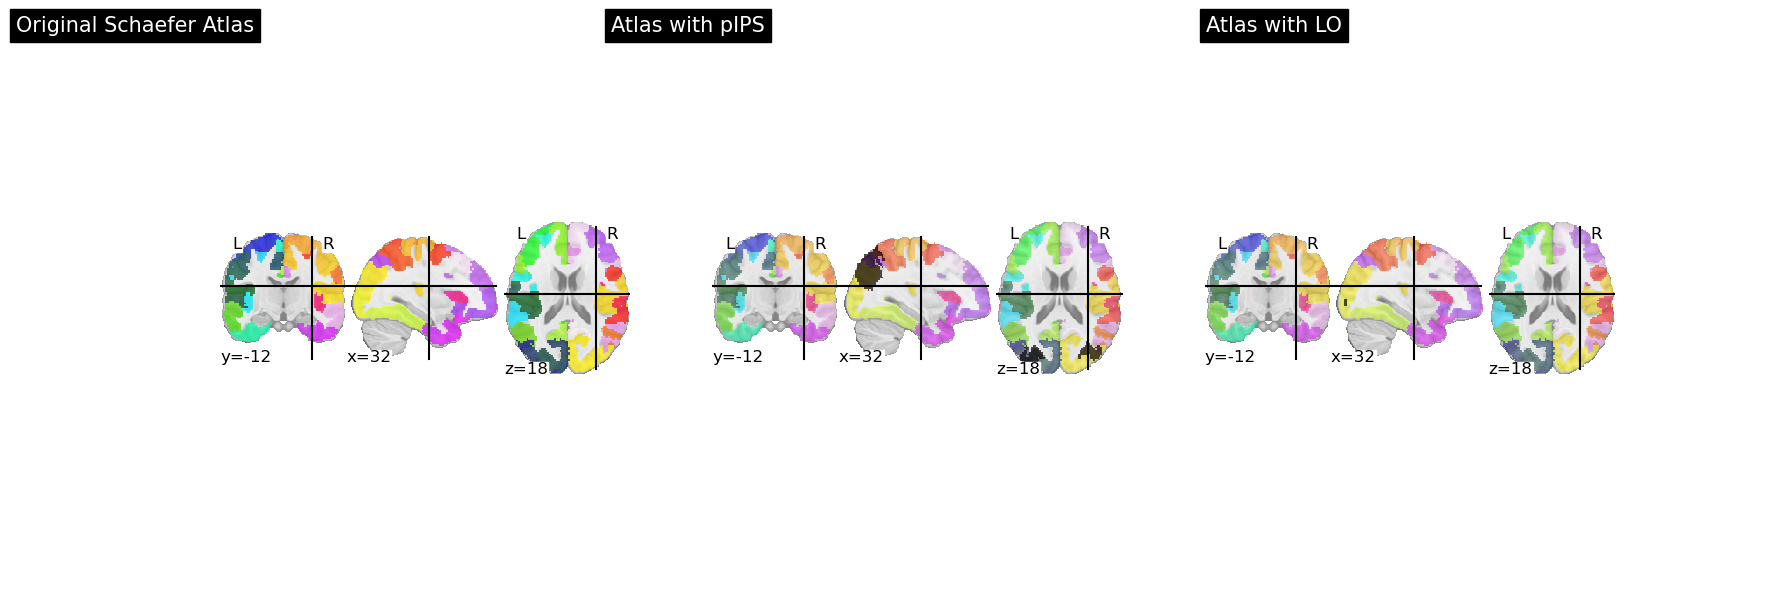

<Figure size 1000x800 with 0 Axes>

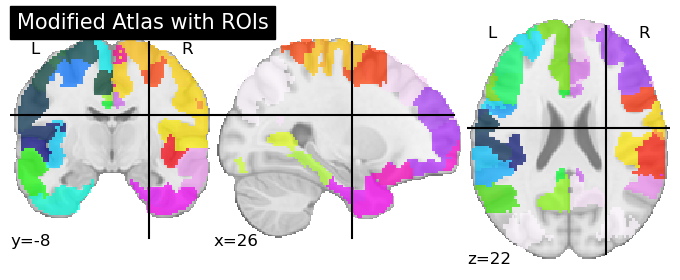

ROI label assignments: {'pIPS': 201, 'LO': 202}


In [ ]:
# GROUP MASK CREATION
# load and process rois + schaefer atlas 
# use roi mask to create a unique atlas

import os
import numpy as np
import pandas as pd
import nibabel as nib
from nilearn import image, datasets, plotting
import matplotlib.pyplot as plt

# Define paths
base_dir = '/user_data/csimmon2/git_repos/ptoc'
roi_dir = f'{base_dir}/roiParcels'
results_dir = f'{base_dir}/results'
group_out_dir = f'{results_dir}/group_averages'

# Load Wang ROIs - LO and pIPS
roi_files = {
    'pIPS': f'{roi_dir}/pIPS.nii.gz',
    'LO': f'{roi_dir}/LO.nii.gz'
}

# Load ROIs
rois = {}
for roi_name, roi_path in roi_files.items():
    if os.path.exists(roi_path):
        rois[roi_name] = nib.load(roi_path)
    else:
        print(f"Warning: ROI file {roi_path} not found!")

# Load Schaefer atlas (200 ROIs)
atlas = datasets.fetch_atlas_schaefer_2018(n_rois=200, yeo_networks=7, resolution_mm=2)
atlas_img = nib.load(atlas.maps)
atlas_labels = atlas.labels

# Split ROIs into left and right hemispheres
hemisphere_rois = {}
for roi_name, roi_img in rois.items():
    # Get ROI data
    roi_data = roi_img.get_fdata()
    
    # Create mask for each hemisphere
    # For MNI space, X coordinates < 45 are left hemisphere, > 45 are right hemisphere
    # (Assuming 91x109x91 dimensions with 2mm resolution)
    center_x = roi_data.shape[0] // 2
    
    # Create left hemisphere mask
    left_data = roi_data.copy()
    left_data[center_x:, :, :] = 0  # Zero out right hemisphere
    hemisphere_rois[f'{roi_name}_left'] = nib.Nifti1Image(left_data, roi_img.affine)
    
    # Create right hemisphere mask
    right_data = roi_data.copy()
    right_data[:center_x, :, :] = 0  # Zero out left hemisphere
    hemisphere_rois[f'{roi_name}_right'] = nib.Nifti1Image(right_data, roi_img.affine)

# Split Schaefer atlas into hemispheres based on labels
# Schaefer labels follow format "7Networks_[LR]_*"
atlas_data = atlas_img.get_fdata()
left_atlas_data = np.zeros_like(atlas_data)
right_atlas_data = np.zeros_like(atlas_data)

left_indices = []
right_indices = []

for i, label in enumerate(atlas_labels):
    label_str = label.decode('utf-8') if isinstance(label, bytes) else str(label)
    if "_L_" in label_str:
        left_indices.append(i+1)  # Schaefer labels start at 1
        mask = (atlas_data == i+1)
        left_atlas_data[mask] = i+1
    elif "_R_" in label_str:
        right_indices.append(i+1)
        mask = (atlas_data == i+1)
        right_atlas_data[mask] = i+1
        
# Direct integration with full atlas
full_atlas_data = atlas_img.get_fdata()
modified_atlas_data = full_atlas_data.copy()

# Add each ROI with a unique label
next_label = int(np.max(full_atlas_data)) + 1
roi_labels = {}

for roi_name, roi_img in rois.items():
    roi_data = roi_img.get_fdata()
    roi_mask = roi_data > 0
    
    # Find overlapping parcels
    overlap_mask = (full_atlas_data > 0) & roi_mask
    overlapping_labels = np.unique(full_atlas_data[overlap_mask])
    overlapping_labels = overlapping_labels[overlapping_labels > 0]
    
    print(f"{roi_name} overlaps with atlas labels: {overlapping_labels}")
    
    # Print more detailed information about the overlaps
    if len(overlapping_labels) > 0:
        for label in overlapping_labels:
            label_mask = (full_atlas_data == label) & roi_mask
            overlap_voxels = np.sum(label_mask)
            print(f"  Label {label}: {overlap_voxels} voxels")
            # Get the name of this label
            if 0 <= label-1 < len(atlas_labels):
                label_name = atlas_labels[int(label)-1]
                print(f"  Label name: {label_name.decode('utf-8') if isinstance(label_name, bytes) else label_name}")
    
    # Remove overlapping parcels
    for label in overlapping_labels:
        modified_atlas_data[modified_atlas_data == label] = 0
    
    # Add ROI with new label
    modified_atlas_data[roi_mask] = next_label
    roi_labels[roi_name] = next_label
    next_label += 1

# Create and save the modified atlas
modified_atlas_img = nib.Nifti1Image(modified_atlas_data, atlas_img.affine)
modified_atlas_file = f'{results_dir}/modified_schaefer_with_rois_direct.nii.gz'
nib.save(modified_atlas_img, modified_atlas_file)

# Create a visualization of the original atlas and each ROI
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Original atlas
plotting.plot_roi(atlas_img, title="Original Schaefer Atlas", axes=axes[0])

# pIPS overlay
p_display = plotting.plot_roi(atlas_img, title="Atlas with pIPS", alpha=0.5, axes=axes[1])
p_display.add_overlay(rois['pIPS'], cmap='hot', alpha=0.7)

# LO overlay
l_display = plotting.plot_roi(atlas_img, title="Atlas with LO", alpha=0.5, axes=axes[2])
l_display.add_overlay(rois['LO'], cmap='hot', alpha=0.7)

plt.tight_layout()
plt.show()

# Show modified atlas
plt.figure(figsize=(10, 8))
plotting.plot_roi(modified_atlas_img, title="Modified Atlas with ROIs")
plt.show()

print(f"ROI label assignments: {roi_labels}")

# Add an additional visualization to see a slice view
# This will show better if there are subtle overlaps
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Show atlas and ROIs in axial (top), sagittal (side), and coronal (front) views
# Atlas only
plotting.plot_roi(atlas_img, display_mode='x', cut_coords=5, title="Atlas Sagittal", axes=axes[0, 0])
plotting.plot_roi(atlas_img, display_mode='y', cut_coords=5, title="Atlas Coronal", axes=axes[0, 1])
plotting.plot_roi(atlas_img, display_mode='z', cut_coords=5, title="Atlas Axial", axes=axes[0, 2])

# Atlas with ROIs
# Find centers of ROIs for better slice positioning
pips_data = rois['pIPS'].get_fdata()
pips_coords = np.where(pips_data > 0)
pips_center = [np.mean(coord) for coord in pips_coords]

lo_data = rois['LO'].get_fdata()
lo_coords = np.where(lo_data > 0)
lo_center = [np.mean(coord) for coord in lo_coords]

# Use ROI centers for cut coordinates
combined_display = plotting.plot_roi(atlas_img, display_mode='x', 
                                    cut_coords=[pips_center[0]], 
                                    title="Atlas + ROIs Sagittal", 
                                    axes=axes[1, 0], alpha=0.5)
combined_display.add_overlay(rois['pIPS'], cmap='Reds', alpha=0.7)
combined_display.add_overlay(rois['LO'], cmap='Blues', alpha=0.7)

combined_display = plotting.plot_roi(atlas_img, display_mode='y', 
                                    cut_coords=[pips_center[1]], 
                                    title="Atlas + ROIs Coronal", 
                                    axes=axes[1, 1], alpha=0.5)
combined_display.add_overlay(rois['pIPS'], cmap='Reds', alpha=0.7)
combined_display.add_overlay(rois['LO'], cmap='Blues', alpha=0.7)

combined_display = plotting.plot_roi(atlas_img, display_mode='z', 
                                    cut_coords=[pips_center[2]], 
                                    title="Atlas + ROIs Axial", 
                                    axes=axes[1, 2], alpha=0.5)
combined_display.add_overlay(rois['pIPS'], cmap='Reds', alpha=0.7)
combined_display.add_overlay(rois['LO'], cmap='Blues', alpha=0.7)

plt.tight_layout()
plt.show()

In [14]:
# Group-level analysis function with hemisphere-specific analysis
def group_level_analysis(analysis_type='fc'):
    """
    Perform group-level analysis of ROI-to-whole-brain connectivity,
    analyzing left ROIs with left parcels and right ROIs with right parcels
    
    Parameters:
    -----------
    analysis_type : str, 'fc' or 'ppi'
        Type of analysis to perform
    
    Returns:
    --------
    Dictionary of results for left and right hemispheres
    """
    results = {}
    
    # Process each hemisphere
    for hemisphere in ['left', 'right']:
        print(f"\nPerforming group-level {analysis_type.upper()} analysis for {hemisphere} hemisphere")
        
        # Load thresholded group average maps
        try:
            pIPS_img = nib.load(f'{group_out_dir}/pIPS_{hemisphere}_{analysis_type}_thresh.nii.gz')
            LO_img = nib.load(f'{group_out_dir}/LO_{hemisphere}_{analysis_type}_thresh.nii.gz')
            print(f"Successfully loaded thresholded maps for {hemisphere} hemisphere")
        except FileNotFoundError as e:
            print(f"Error: Could not find thresholded map files. {str(e)}")
            print(f"Looking for files at {group_out_dir}/pIPS_{hemisphere}_{analysis_type}_thresh.nii.gz")
            print(f"and {group_out_dir}/LO_{hemisphere}_{analysis_type}_thresh.nii.gz")
            print("Please check that these files exist or adjust the paths.")
            continue
            
        # Create hemisphere-specific atlas mask
        hemi_prefix = "L" if hemisphere == "left" else "R"
        hemi_mask = np.zeros_like(atlas_img.get_fdata(), dtype=bool)
        
        # Get atlas data
        atlas_data = atlas_img.get_fdata()
        
        # Find parcels for this hemisphere in the atlas
        for i, label in enumerate(atlas_labels):
            label_str = label.decode('utf-8') if isinstance(label, bytes) else str(label)
            if f"_{hemi_prefix}_" in label_str:
                # This is a parcel from the correct hemisphere
                hemi_mask |= (atlas_data == i+1)
        
        # Add the ROIs for this hemisphere
        roi_pIPS_value = roi_indices['pIPS']
        roi_LO_value = roi_indices['LO']
        
        # Create hemisphere-specific atlas
        hemi_atlas_data = np.zeros_like(atlas_data)
        hemi_atlas_data[hemi_mask] = atlas_data[hemi_mask]
        
        # Add ROIs to hemisphere atlas
        pIPS_mask = rois[f'pIPS_{hemisphere}'].get_fdata() > 0
        LO_mask = rois[f'LO_{hemisphere}'].get_fdata() > 0
        
        hemi_atlas_data[pIPS_mask] = roi_pIPS_value
        hemi_atlas_data[LO_mask] = roi_LO_value
        
        hemi_atlas_img = nib.Nifti1Image(hemi_atlas_data, atlas_img.affine)
        
        # Use NiftiLabelsMasker to extract average values in each atlas region
        masker = NiftiLabelsMasker(labels_img=hemi_atlas_img, standardize=False)
        
        # Extract values from each map
        pIPS_values = masker.fit_transform(pIPS_img)[0]
        LO_values = masker.fit_transform(LO_img)[0]
        
        # Print basic stats to verify the extraction
        print(f"pIPS values - mean: {np.mean(pIPS_values):.3f}, max: {np.max(pIPS_values):.3f}")
        print(f"LO values - mean: {np.mean(LO_values):.3f}, max: {np.max(LO_values):.3f}")
        
        # Get indices of all non-zero parcels in this hemisphere
        hemi_indices = np.where(np.sum(hemi_atlas_data > 0, axis=(1, 2)) > 0)[0]
        
        # Create mask for parcels in this hemisphere (excluding ROIs)
        parcel_mask = np.ones(len(pIPS_values), dtype=bool)
        parcel_mask[roi_pIPS_value-1] = False  # Exclude pIPS
        parcel_mask[roi_LO_value-1] = False    # Exclude LO
        
        # Filter to only include parcels with values
        non_zero_mask = pIPS_values != 0
        valid_mask = parcel_mask & non_zero_mask
        
        # Get vectors for this hemisphere
        pIPS_vector = pIPS_values[valid_mask]
        LO_vector = LO_values[valid_mask]
        valid_indices = np.where(valid_mask)[0]
        
        # Verify vectors aren't empty
        if len(pIPS_vector) == 0 or len(LO_vector) == 0:
            print("Error: Extracted vectors are empty. Check masking process.")
            continue
        
        # Compute similarity between vectors
        similarity, p_value = pearsonr(pIPS_vector, LO_vector)
        print(f"Similarity between pIPS and LO connectivity: r = {similarity:.3f}, p = {p_value:.5f}")
        
        # Find top 10 most similar and dissimilar regions
        diff_vector = np.abs(pIPS_vector - LO_vector)
        
        # Get indices for sorting
        similar_sort_idx = np.argsort(diff_vector)
        dissimilar_sort_idx = similar_sort_idx[::-1]
        
        # Get top 10 indices (or fewer if less than 10 regions)
        n_similar = min(10, len(similar_sort_idx))
        similar_idx = similar_sort_idx[:n_similar]
        dissimilar_idx = dissimilar_sort_idx[:n_similar]
        
        # Map back to original atlas indices
        similar_atlas_idx = valid_indices[similar_idx]
        dissimilar_atlas_idx = valid_indices[dissimilar_idx]
        
        # Get region names
        try:
            similar_regions = []
            dissimilar_regions = []
            
            for idx in similar_atlas_idx:
                if 0 <= idx < len(atlas_labels):
                    label = atlas_labels[idx]
                    similar_regions.append(label.decode('utf-8') if isinstance(label, bytes) else str(label))
                else:
                    similar_regions.append(f"Region {idx+1}")
            
            for idx in dissimilar_atlas_idx:
                if 0 <= idx < len(atlas_labels):
                    label = atlas_labels[idx]
                    dissimilar_regions.append(label.decode('utf-8') if isinstance(label, bytes) else str(label))
                else:
                    dissimilar_regions.append(f"Region {idx+1}")
        except Exception as e:
            print(f"Error retrieving region names: {str(e)}")
            similar_regions = [f"Region {idx+1}" for idx in similar_atlas_idx]
            dissimilar_regions = [f"Region {idx+1}" for idx in dissimilar_atlas_idx]
        
        # Print results
        print("\nTop Most Similar Regions:")
        for i, (idx, name) in enumerate(zip(similar_idx, similar_regions)):
            print(f"{i+1}. {name} (diff = {diff_vector[idx]:.3f}, " + 
                  f"pIPS = {pIPS_vector[idx]:.3f}, LO = {LO_vector[idx]:.3f})")
        
        print("\nTop Most Dissimilar Regions:")
        for i, (idx, name) in enumerate(zip(dissimilar_idx, dissimilar_regions)):
            print(f"{i+1}. {name} (diff = {diff_vector[idx]:.3f}, " + 
                  f"pIPS = {pIPS_vector[idx]:.3f}, LO = {LO_vector[idx]:.3f})")
        
        # Visualize the results
        try:
            plot_similarity_results(pIPS_vector, LO_vector, 
                                   similar_idx, dissimilar_idx, 
                                   similar_regions, dissimilar_regions, 
                                   analysis_type, hemisphere)
        except Exception as e:
            print(f"Error plotting results: {str(e)}")
        
        # Store results for this hemisphere
        results[hemisphere] = {
            'pIPS_vector': pIPS_vector,
            'LO_vector': LO_vector,
            'similarity': similarity,
            'p_value': p_value,
            'similar_regions': similar_regions,
            'dissimilar_regions': dissimilar_regions
        }
    
    return results

def plot_similarity_results(pIPS_vector, LO_vector, similar_indices, dissimilar_indices,
                           similar_names, dissimilar_names, analysis_type, hemisphere):
    """
    Plot the connectivity pattern similarity results
    """
    # Create DataFrames for plotting
    similar_df = pd.DataFrame({
        'Region': similar_names,
        'pIPS': [pIPS_vector[idx] for idx in similar_indices],
        'LO': [LO_vector[idx] for idx in similar_indices]
    })
    
    dissimilar_df = pd.DataFrame({
        'Region': dissimilar_names,
        'pIPS': [pIPS_vector[idx] for idx in dissimilar_indices],
        'LO': [LO_vector[idx] for idx in dissimilar_indices]
    })
    
    # Shorten region names for plotting
    similar_df['Region'] = similar_df['Region'].apply(lambda x: str(x).replace('7Networks_', '').replace('_', ' '))
    dissimilar_df['Region'] = dissimilar_df['Region'].apply(lambda x: str(x).replace('7Networks_', '').replace('_', ' '))
    
    # Calculate absolute differences for display
    similar_df['Abs_Diff'] = np.abs(similar_df['pIPS'] - similar_df['LO'])
    dissimilar_df['Abs_Diff'] = np.abs(dissimilar_df['pIPS'] - dissimilar_df['LO'])
    
    # Plot similar regions
    plt.figure(figsize=(14, 10))
    
    # Similar regions subplot
    plt.subplot(2, 1, 1)
    x = np.arange(len(similar_df))
    width = 0.35
    plt.bar(x - width/2, similar_df['pIPS'], width, label='pIPS')
    plt.bar(x + width/2, similar_df['LO'], width, label='LO')
    plt.xlabel('Region')
    plt.ylabel('Connectivity Strength')
    plt.title(f'Most Similar Regions - {hemisphere.capitalize()} Hemisphere {analysis_type.upper()}')
    plt.xticks(x, similar_df['Region'], rotation=45, ha='right')
    plt.legend()
    
    # Dissimilar regions subplot
    plt.subplot(2, 1, 2)
    x = np.arange(len(dissimilar_df))
    plt.bar(x - width/2, dissimilar_df['pIPS'], width, label='pIPS')
    plt.bar(x + width/2, dissimilar_df['LO'], width, label='LO')
    plt.xlabel('Region')
    plt.ylabel('Connectivity Strength')
    plt.title(f'Most Dissimilar Regions - {hemisphere.capitalize()} Hemisphere {analysis_type.upper()}')
    plt.xticks(x, dissimilar_df['Region'], rotation=45, ha='right')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig(f'{results_dir}/group_similarity_results_{analysis_type}_{hemisphere}.png', dpi=300)
    plt.show()
    
    # Create a scatter plot of pIPS vs LO connectivity
    plt.figure(figsize=(10, 10))
    plt.scatter(pIPS_vector, LO_vector, alpha=0.5)
    
    # Highlight similar regions
    plt.scatter([pIPS_vector[idx] for idx in similar_indices], 
                [LO_vector[idx] for idx in similar_indices], 
                color='green', s=100, label='Most Similar')
    
    # Highlight dissimilar regions
    plt.scatter([pIPS_vector[idx] for idx in dissimilar_indices], 
                [LO_vector[idx] for idx in dissimilar_indices], 
                color='red', s=100, label='Most Dissimilar')
    
    # Compute Pearson correlation
    corr, p_val = pearsonr(pIPS_vector, LO_vector)
    
    # Plot diagonal line
    min_val = min(np.min(pIPS_vector), np.min(LO_vector))
    max_val = max(np.max(pIPS_vector), np.max(LO_vector))
    plt.plot([min_val, max_val], [min_val, max_val], 'k--')
    
    plt.xlabel('pIPS Connectivity')
    plt.ylabel('LO Connectivity')
    plt.title(f'pIPS vs LO Connectivity - {hemisphere.capitalize()} Hemisphere {analysis_type.upper()}\nr = {corr:.3f}, p = {p_val:.5f}')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'{results_dir}/group_scatter_plot_{analysis_type}_{hemisphere}.png', dpi=300)
    plt.show()

# Run the group-level analysis for both hemispheres
results = group_level_analysis(analysis_type='fc')

# Print summary of results
for hemisphere, result in results.items():
    print(f"\n{hemisphere.capitalize()} Hemisphere:")
    print(f"Similarity (r): {result['similarity']:.3f} (p = {result['p_value']:.5f})")
    print(f"Number of regions analyzed: {len(result['pIPS_vector'])}")


Performing group-level FC analysis for left hemisphere
Successfully loaded thresholded maps for left hemisphere


NameError: name 'roi_indices' is not defined